In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Step 1: CSV 파일을 읽어오기
file_path = 'source/no_open.csv'
df = pd.read_csv(file_path)

In [4]:
df2 = df[df['ORD'] <= 6]

In [5]:
df3 = df2.loc[:, ['RC_DIST', 'ORD', 'AGE', 'horse_weight', 'weight_gain', 'RC_TIME', 'WG_BUDAM', 'JK_AGE', 'JK_CAREER', 'TR_CAREER']]

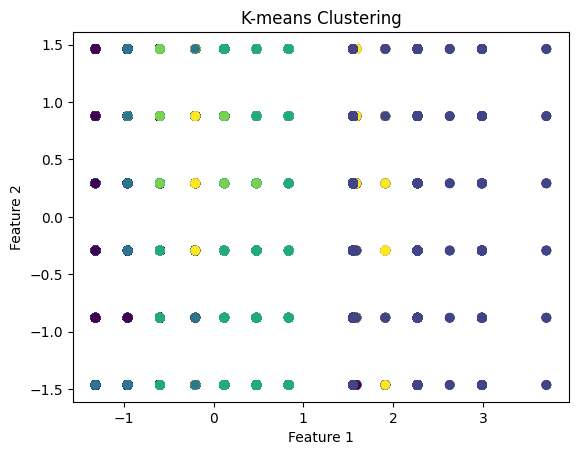

In [7]:
# Step 2: 필요한 전처리 수행하기
# 필요에 따라 군집화를 위한 열을 선택합니다.
# 예시로 숫자형 열만 선택합니다.
numeric_cols = df3.select_dtypes(include=['float64', 'int64'])
data = numeric_cols.dropna()  # 결측값 제거

# Step 3: 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: K-means 알고리즘 적용
kmeans = KMeans(n_clusters=6, random_state=42)  # 군집 수는 3개로 설정 (필요에 따라 변경)
kmeans.fit(scaled_data)

# 군집 결과 추가
data['cluster'] = kmeans.labels_

# Step 5: 군집 시각화 (2D로 시각화할 수 있는 경우)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


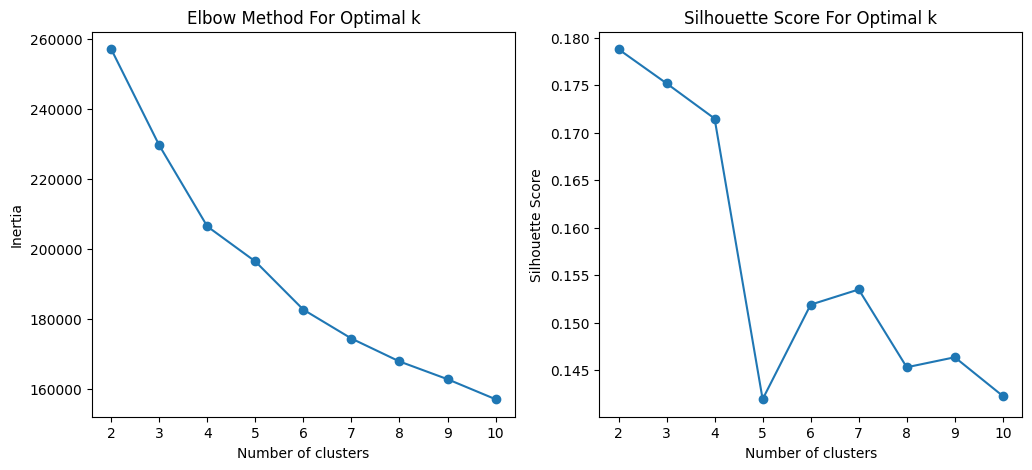

In [9]:
from sklearn.metrics import silhouette_score

# 엘보 방법 예시
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# 엘보 방법 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()


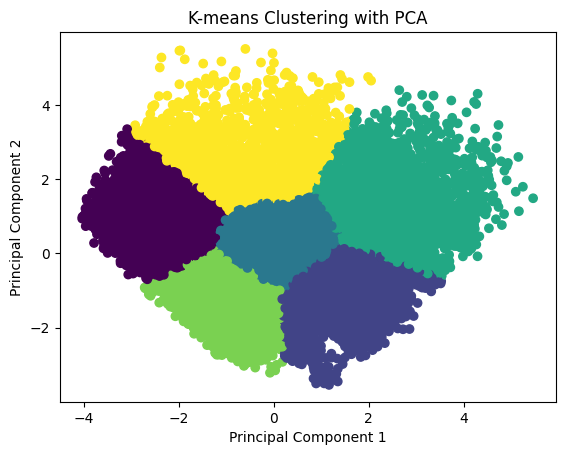

In [10]:
from sklearn.decomposition import PCA

# PCA를 사용해 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-means 군집화 수행
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_data)
pca.explained_variance_ratio_

# 군집화 결과 시각화
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()



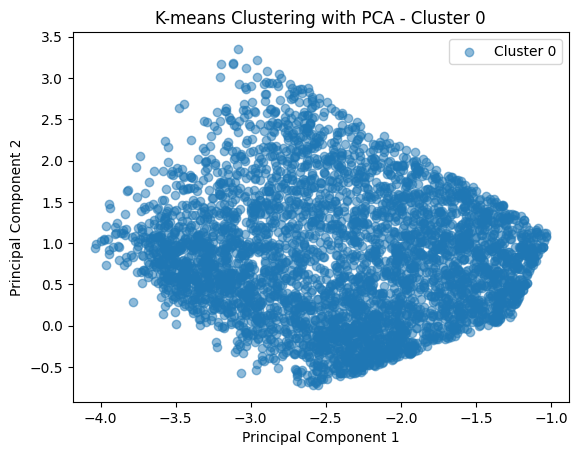

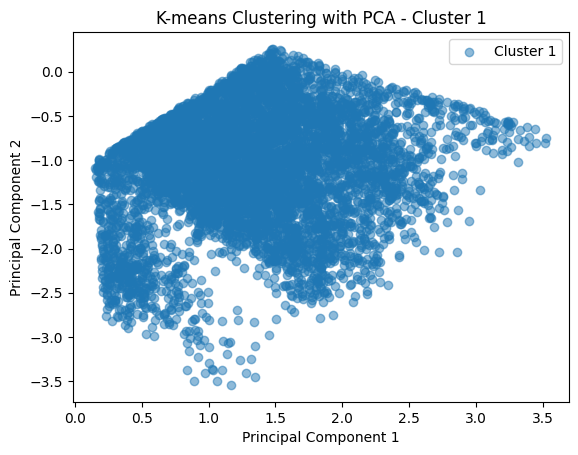

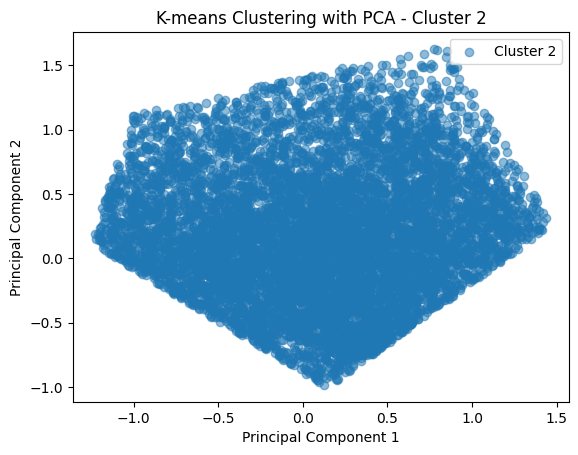

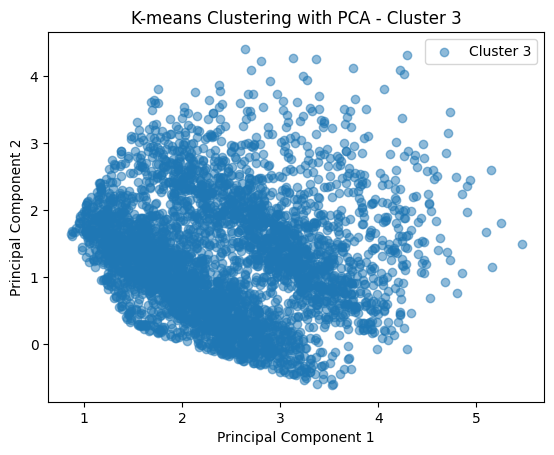

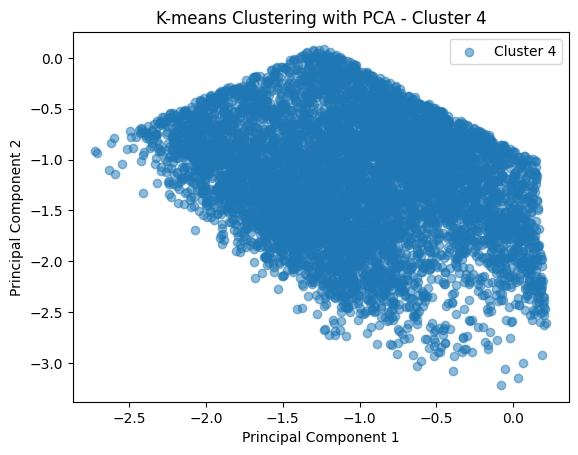

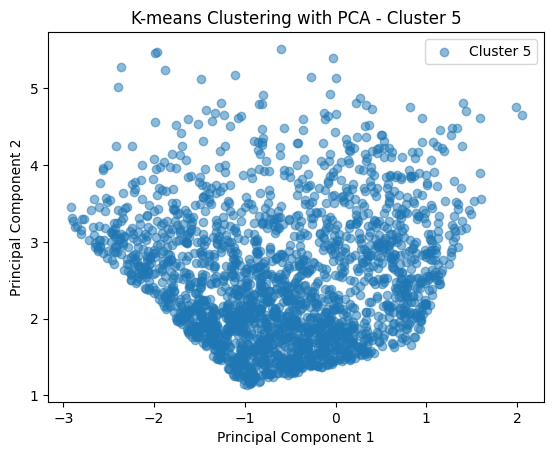

In [11]:
import matplotlib.pyplot as plt

# 각 군집을 확인하기 위한 반복문
for i in range(6):  # 군집 개수만큼 반복 (0, 1, 2)
    cluster_data = pca_data[kmeans.labels_ == i]
    
    # 군집 내 데이터 시각화
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with PCA - Cluster {i}')
    plt.legend()
    plt.show()


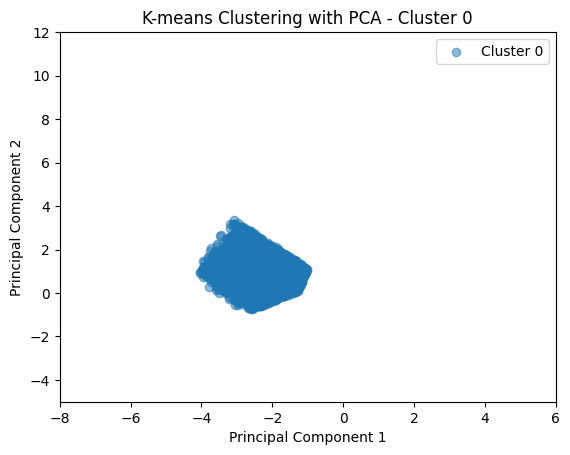

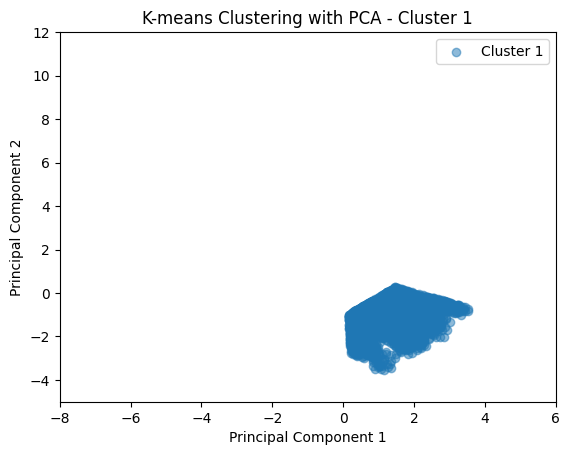

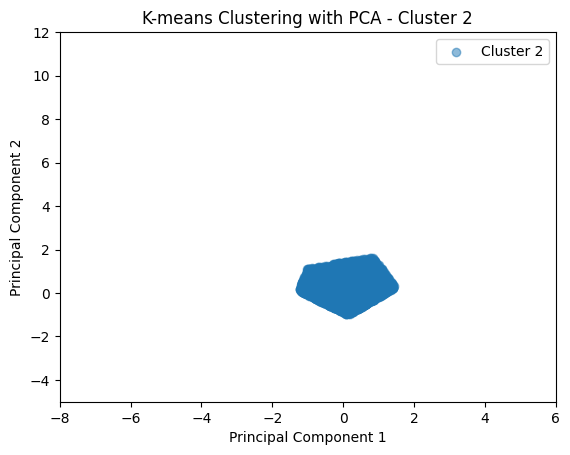

In [12]:
import matplotlib.pyplot as plt

# 고정할 x축과 y축 범위 지정
x_lim = (-8, 6)
y_lim = (-5, 12)

# 각 군집을 확인하기 위한 반복문
for i in range(3):  # 군집 개수만큼 반복 (0, 1, 2)
    cluster_data = pca_data[kmeans.labels_ == i]
    
    # 군집 내 데이터 시각화
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with PCA - Cluster {i}')
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.legend()
    plt.show()


In [14]:
import pandas as pd

# 주성분에 맞는 특성 이름 생성
feature_names = [f'Feature{i}' for i in range(1, pca.components_.shape[1] + 1)]

# PCA 주성분 데이터프레임 생성
pca_components = pd.DataFrame(pca.components_, columns=feature_names)
pca_components.index = ['Principal Component 1', 'Principal Component 2']

# 주요 기여 요소 확인
print(pca_components)


                       Feature1  Feature2  Feature3  Feature4  Feature5  \
Principal Component 1  0.528926  0.004430  0.042735  0.456508  0.031906   
Principal Component 2  0.343563  0.076887  0.413900 -0.037978  0.005778   

                       Feature6  Feature7  Feature8  Feature9  Feature10  
Principal Component 1  0.371882 -0.228433 -0.332158 -0.398976  -0.221324  
Principal Component 2  0.511067  0.268764  0.438599  0.421127  -0.011054  


In [15]:
# 주성분별로 절대값 기준 상위 5개 변수 찾기
for i in range(2):  # 두 개의 주성분이므로 0, 1로 반복
    component = pca_components.iloc[i]
    top_features = component.abs().nlargest(5)  # 절대값이 큰 상위 5개 변수 추출
    print(f"Principal Component {i+1} top contributing features:")
    print(top_features)
    print()


Principal Component 1 top contributing features:
Feature1    0.528926
Feature4    0.456508
Feature9    0.398976
Feature6    0.371882
Feature8    0.332158
Name: Principal Component 1, dtype: float64

Principal Component 2 top contributing features:
Feature6    0.511067
Feature8    0.438599
Feature9    0.421127
Feature3    0.413900
Feature1    0.343563
Name: Principal Component 2, dtype: float64



In [17]:
import pandas as pd

# df의 열 이름을 Feature1, Feature2, ... 순서대로 매칭
feature_names = df3.columns

# 주요 기여 변수를 매칭하여 출력
for i in range(2):  # 두 개의 주성분이므로 0, 1로 반복
    component = pca_components.iloc[i]
    top_features = component.abs().nlargest(5)  # 절대값이 큰 상위 5개 변수 추출
    
    # 매칭 결과 출력
    print(f"Principal Component {i+1} top contributing features:")
    for feature, value in top_features.items():
        feature_name = feature_names[int(feature[7:]) - 1]  # Feature 인덱스를 사용하여 매칭
        print(f"{feature_name}: {value}")
    print()


Principal Component 1 top contributing features:
RC_DIST: 0.5289264789616898
horse_weight: 0.4565081015753249
JK_CAREER: 0.39897621762072555
RC_TIME: 0.3718822880305038
JK_AGE: 0.33215793297857776

Principal Component 2 top contributing features:
RC_TIME: 0.5110673925222243
JK_AGE: 0.43859918320639657
JK_CAREER: 0.4211274188587518
AGE: 0.41390022010965044
RC_DIST: 0.34356289997576744

